# Diamond Regression

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('sample.csv')

In [4]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,11207,1.01,Premium,H,VS2,61.3,59.0,4959,6.44,6.48,3.96
1,45562,0.52,Ideal,E,VS2,62.6,57.0,1689,5.09,5.17,3.21
2,38306,0.37,Good,G,SI2,63.4,57.0,487,4.55,4.57,2.89
3,35616,0.30,Premium,I,VS1,61.7,59.0,473,4.26,4.30,2.64
4,38380,0.39,Ideal,F,VS1,62.2,56.0,1024,4.70,4.63,2.90


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   carat       10000 non-null  float64
 2   cut         10000 non-null  object 
 3   color       10000 non-null  object 
 4   clarity     10000 non-null  object 
 5   depth       10000 non-null  float64
 6   table       10000 non-null  float64
 7   price       10000 non-null  int64  
 8   x           10000 non-null  float64
 9   y           10000 non-null  float64
 10  z           10000 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [6]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# sns.pairplot(dataset[["carat", "price", "x", "y", "z"]])

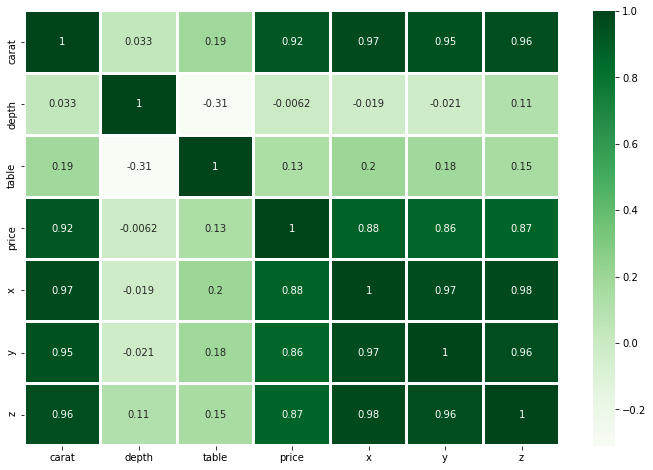

In [8]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Greens', linewidths = 2)
plt.show()

## Data Preprocessing

In [9]:
df =dataset

In [10]:
dummy = pd.get_dummies(df[['color','clarity']])
dummy

,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
9998,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [11]:
pd.DataFrame(df['carat'])

,carat
0,1.01
1,0.52
2,0.37
3,0.30
4,0.39
...,...
9995,0.72
9996,0.30
9997,1.47
9998,0.62


In [12]:
prepared = pd.merge(dummy, pd.DataFrame(df['carat']),left_index=True, right_index=True)
prepared

,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.01
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.52
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.37
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.30
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.72
9996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.30
9997,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.47
9998,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.62


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = np.array(prepared)
y = np.array(df['price'])

In [15]:
X

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.01],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.52],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.37],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.47],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.62],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.7 ]])

In [16]:
len(X)

10000

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size=0.8)

In [18]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8000
2000
8000
2000


## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model_01 = LinearRegression()

In [21]:
model_01.fit(X_train,y_train)

LinearRegression()

In [22]:
# R-square
model_01.score(X_train,y_train)

0.9145019000035407

In [23]:
y_pred = model_01.predict(X_test)

## Evaluation

In [24]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

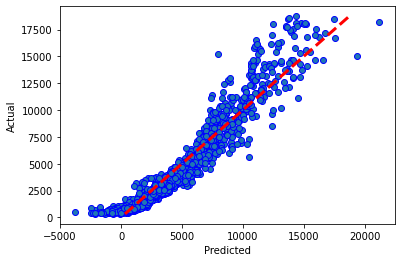

In [25]:
# Actual vs Predicted graph

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [26]:
from sklearn import metrics

In [27]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
max_error = metrics.max_error(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R^2 is {}'.format(r2))
print('max error is {}'.format(max_error))

The model performance for testing set
--------------------------------------
MAE is 778.9135
MSE is 1206880.97675
R^2 is 0.9174031607425228
max error is 7266.875
